In [17]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
from scipy.optimize import curve_fit
import math
%matplotlib inline

In [18]:
FILENAME = "gamma_mergeall_gaus.root" #TFile("ana.root","READ")
FILENAME = "gamma_e_compare.root" #TFile("ana.root","READ")

gamma_v = rn.root2array(FILENAME,
                    treename='tree',
                    branches=['hit_reco_e','reco_e','mc_e','sum','sum_adj','sum_reco_int'])


true_e = [gamma_v[i][2] for i in xrange(gamma_v.shape[0])]
reco_e = [gamma_v[i][1] for i in xrange(gamma_v.shape[0])]
sum_v = [gamma_v[i][3] for i in xrange(gamma_v.shape[0])]
sum_adj_v = [gamma_v[i][4] for i in xrange(gamma_v.shape[0])]
sum_reco_int = [gamma_v[i][5] for i in xrange(gamma_v.shape[0])]


res = [ (reco_e[i] - true_e[i]) / true_e[i] for i in xrange(len(true_e))]
ratio = [ (true_e[i]) / sum_reco_int[i]/1000 for i in xrange(len(true_e)) ] #if reco_e[i] != 0]
ratio_all = [ (true_e[i]) / sum_v[i]/1000 for i in xrange(len(true_e)) ] #if reco_e[i] != 0]


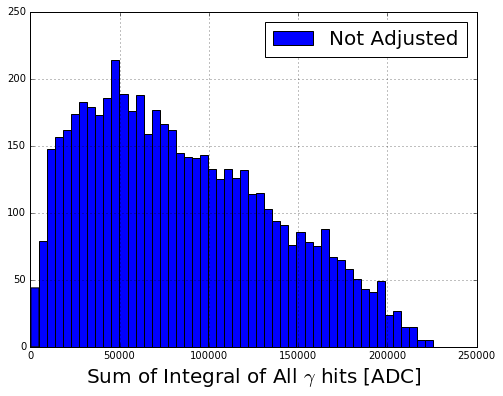

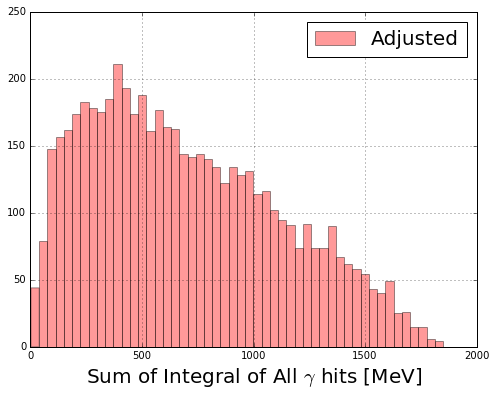

In [19]:
plt.figure(figsize=(8,6))
plt.hist(sum_v,bins=50,label="Not Adjusted") #, norm=LogNorm())
#plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True)
plt.xlabel("Sum of Integral of All $\gamma$ hits [ADC]",fontsize=20)
plt.legend(loc=0,fontsize=20)

plt.figure(figsize=(8,6))
plt.hist(sum_adj_v,bins=50,color='r',alpha=0.4,label="Adjusted") #, norm=LogNorm())
plt.grid(True)
plt.xlabel("Sum of Integral of All $\gamma$ hits [MeV]",fontsize=20)
plt.legend(loc=0,fontsize=20)


In [20]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


[  3.87973616e+02   1.01982298e-05   9.00783148e-07]


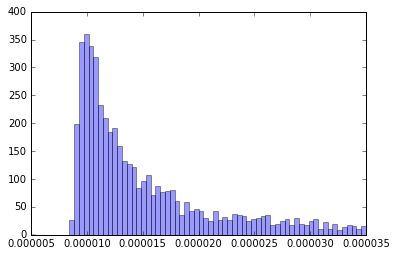

In [72]:

n_counts, bin_edges, _ = plt.hist(ratio,bins=70,color='b',alpha=0.4,range=[0.000005,0.000035]) #, norm=LogNorm())
bins = (bin_edges[:-1] + bin_edges[1:])/2

coeff, _ = curve_fit(gauss, bins[5:14], n_counts[5:14], p0=([350.,0.000009,0.000002]))
print coeff


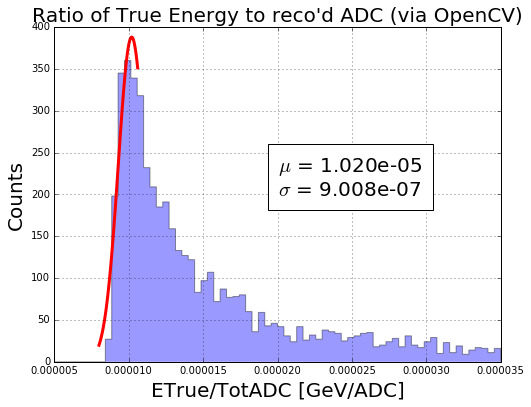

In [73]:

x_g = np.linspace(0.000008,0.0000106,80)
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(ratio,bins=70,range=(0.000005,.000035),histtype='step',fill='b',alpha=0.4,edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
plt.text(0.00002, 200, '$\mu$ = %.3e \n$\sigma$ = %.3e' % \
                (coeff[1], coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
plt.title("Ratio of True Energy to reco'd ADC (via OpenCV)",fontsize=20)
plt.xlabel("ETrue/TotADC [GeV/ADC]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)

[  9.95920310e+02   9.34927195e-06   6.49268115e-07]


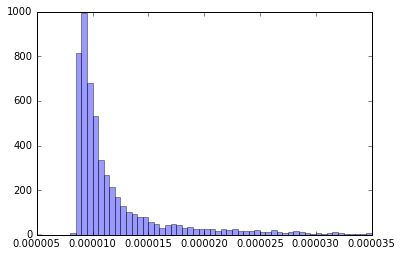

In [74]:
n_counts2, bin_edges2, _ = plt.hist(ratio_all,bins=60,color='b',alpha=0.4,range=[0.000005,0.000035])
bins2 = (bin_edges2[:-1] + bin_edges2[1:])/2
#print n_counts2
coeff2, _ = curve_fit(gauss, bins2[6:11], n_counts2[6:11], p0=([1000.,0.000009,0.000001]))
print coeff2

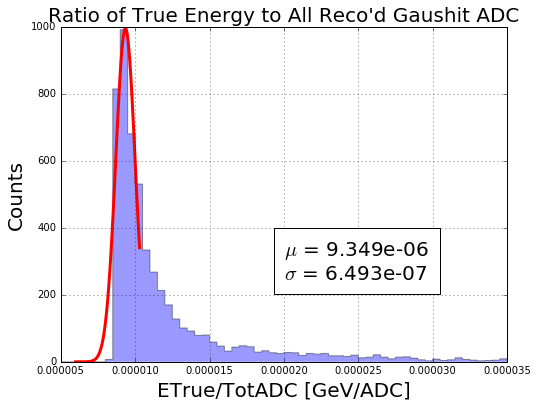

In [76]:
x_g = np.linspace(0.000006,0.0000103,80)
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(ratio_all,bins=60,range=(0.000005,.000035),histtype='step',fill='b',alpha=0.4,edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff2), 'r-',label='Gaussian Fit',lw=3)
plt.text(0.00002, 250, '$\mu$ = %.3e \n$\sigma$ = %.3e' % \
                (coeff2[1], coeff2[2]),fontsize=20,bbox={'facecolor':'white','pad':10})

plt.title("Ratio of True Energy to All Reco'd Gaushit ADC",fontsize=20)
plt.xlabel("ETrue/TotADC [GeV/ADC]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(ratio,bins=50,color='b',alpha=0.4,range=[0,0.000025]) #, norm=LogNorm())
plt.grid(True)
plt.xlabel("ETrue/TotADC [GeV/ADC]",fontsize=20)
plt.legend(loc=0,fontsize=20)

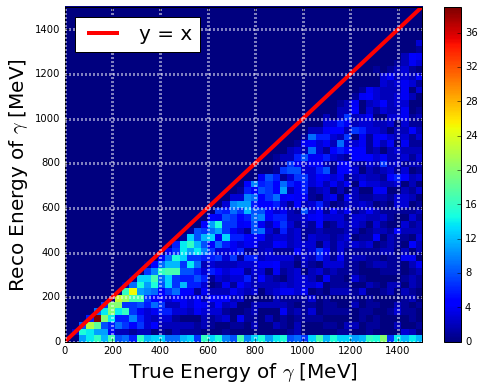

In [3]:
x = np.arange(0,3000,10)

plt.figure(figsize=(8,6))
plt.hist2d(true_e,reco_e,bins=50,\
           range=np.array([(0,1500), (0,1500)])) #, norm=LogNorm())
plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True,color='w',lw=3)
plt.xlabel("True Energy of $\gamma$ [MeV]",fontsize=20)
plt.ylabel("Reco Energy of $\gamma$ [MeV]",fontsize=20)
plt.legend(loc=2,fontsize=20)
plt.colorbar()
plt.savefig("Plots/RecoMCEnergyCompare_Gamma_Gaus.png")
plt.show()

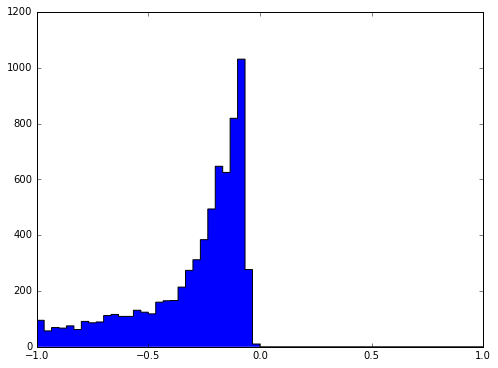

In [22]:
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(res,bins=60,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins = (bin_edges[:-1] + bin_edges[1:])/2

In [62]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# Calculate Gaussian distribution
coeff, _ = curve_fit(gauss, bins[26:], n_counts[26:], p0=([1000.,0,0.5]))
print coeff

[  1.13454783e+03  -9.50367511e-02   2.67858239e-02]


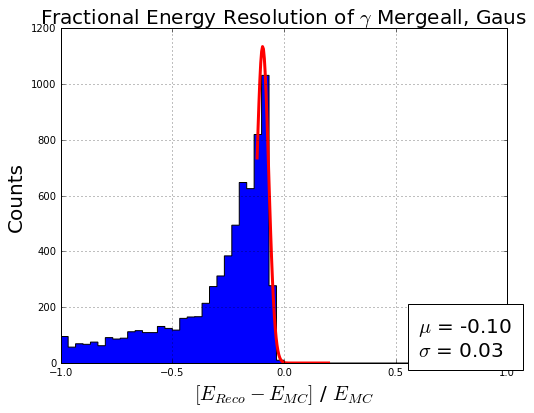

In [64]:
x_g = np.linspace(-.12,0.2,80)
bias = -0.1
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(res,bins=60,range=(-1,1.),histtype='step',fill='b',edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
plt.text(0.6, 30, '$\mu$ = %.2f \n$\sigma$ = %.2f' % \
                (coeff[1], coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
#plt.text(0.6, 30, '$\mu$ = %.2f \n$\sigma$ = %.2f \nx = %.2f' % \
#                (coeff[1], coeff[2],bias),fontsize=20,bbox={'facecolor':'white','pad':10})
#plt.axvline(bias,color='g',lw=3)
plt.title("Fractional Energy Resolution of $\gamma$ Mergeall, Gaus",fontsize=20)
plt.xlabel("$[E_{Reco} - E_{MC}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)

plt.savefig("Plots/EnergyResolution_Gamma_Gaus.png")

HIT02!

In [27]:
FILENAME = "gamma_mergeall_hit02.root" #TFile("ana.root","READ")
FILENAME = "gamma_mergeallviahits_hit02.root" #TFile("ana.root","READ")

gamma_v_02 = rn.root2array(FILENAME,
                    treename='tree',
                    branches=['hit_reco_e','reco_e','mc_e'])


true_e_02 = [gamma_v_02[i][2] for i in xrange(gamma_v_02.shape[0])]
reco_e_02 = [gamma_v_02[i][1] for i in xrange(gamma_v_02.shape[0])]

res_02 = [ (reco_e_02[i] - true_e_02[i]) / true_e_02[i] for i in xrange(len(true_e_02))]

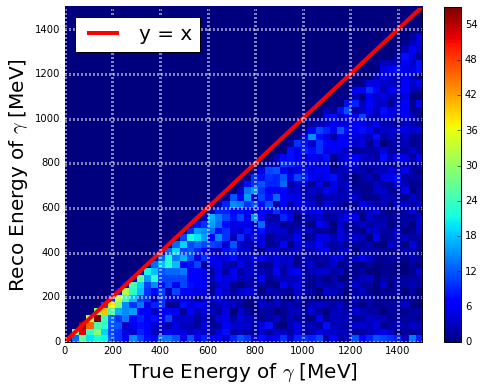

In [28]:
x = np.arange(0,3000,10)

plt.figure(figsize=(8,6))
plt.hist2d(true_e_02,reco_e_02,bins=50,\
           range=np.array([(0,1500), (0,1500)])) #, norm=LogNorm())
plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True,color='w',lw=3)
plt.xlabel("True Energy of $\gamma$ [MeV]",fontsize=20)
plt.ylabel("Reco Energy of $\gamma$ [MeV]",fontsize=20)
plt.legend(loc=2,fontsize=20)
plt.colorbar()
plt.savefig("Plots/RecoMCEnergyCompare_Gamma_Hit02.png")
plt.show()

[  6.18212097e+02  -1.69512116e-01   7.81921872e-02]


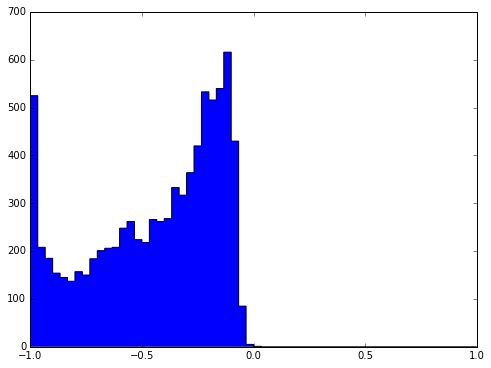

In [29]:
plt.figure(figsize=(8,6))
n_counts_02, bin_edges_02, _ = plt.hist(res_02,bins=60,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins_02 = (bin_edges_02[:-1] + bin_edges_02[1:])/2

# Calculate Gaussian distribution
coeff_02, _ = curve_fit(gauss, bins_02[22:], n_counts_02[22:], p0=([500.,0,0.5]))
print coeff_02

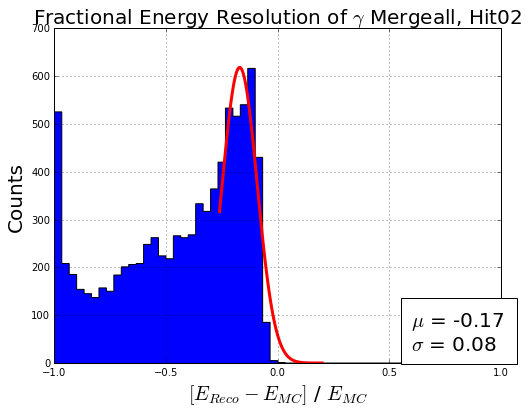

In [38]:
x_g = np.linspace(-.26,0.2,80)

bias = -0.15
plt.figure(figsize=(8,6))
n_counts_02, bin_edges_02, _ = plt.hist(res_02,bins=60,range=(-1,1.),histtype='step',fill='b',edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff_02), 'r-',label='Gaussian Fit',lw=3)
plt.text(0.6, 30, '$\mu$ = %.2f \n$\sigma$ = %.2f' % \
                (coeff_02[1], coeff_02[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
#plt.text(0.6, 30, '$\mu$ = %.2f \n$\sigma$ = %.2f \nx = %.2f' % \
#                (coeff_02[1], coeff_02[2],bias),fontsize=20,bbox={'facecolor':'white','pad':10})
plt.title("Fractional Energy Resolution of $\gamma$ Mergeall, Hit02",fontsize=20)
plt.xlabel("$[E_{Reco} - E_{MC}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
#plt.axvline(bias,color='g',lw=3)
plt.savefig("Plots/EnergyResolution_Gamma_Hit02.png")

In [70]:
FILENAME = "gamma_cluster_gaus.root" #TFile("ana.root","READ")
FILENAME = "gamma_e_compare.root" 

gamma_v_clus = rn.root2array(FILENAME,
                    treename='tree',
                    branches=['hit_reco_e','reco_e','mc_e'])


true_e_clus = [gamma_v_clus[i][2] for i in xrange(gamma_v_clus.shape[0])]
reco_e_clus = [gamma_v_clus[i][1] for i in xrange(gamma_v_clus.shape[0])]

res_clus = [ (reco_e_clus[i] - true_e_clus[i]) / true_e_clus[i] for i in xrange(len(true_e_clus))]

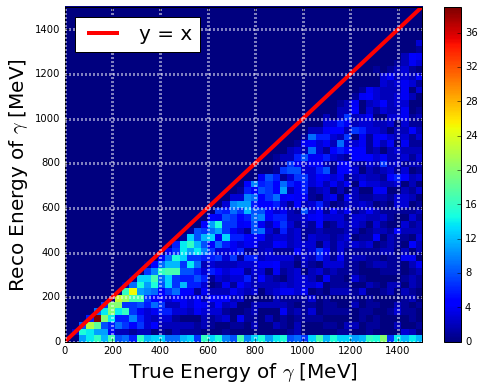

In [71]:
x = np.arange(0,3000,10)

plt.figure(figsize=(8,6))
plt.hist2d(true_e_clus,reco_e_clus,bins=50,\
           range=np.array([(0,1500), (0,1500)])) #, norm=LogNorm())
plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True,color='w',lw=3)
plt.xlabel("True Energy of $\gamma$ [MeV]",fontsize=20)
plt.ylabel("Reco Energy of $\gamma$ [MeV]",fontsize=20)
plt.legend(loc=2,fontsize=20)
plt.colorbar()
plt.savefig("Plots/RecoMCEnergyCompare_Gamma_ClusGaus.png")
plt.show()

[  3.76580967e+02  -2.23845619e-01   8.89299841e-02]


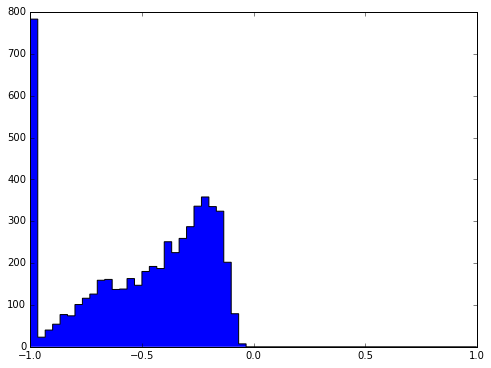

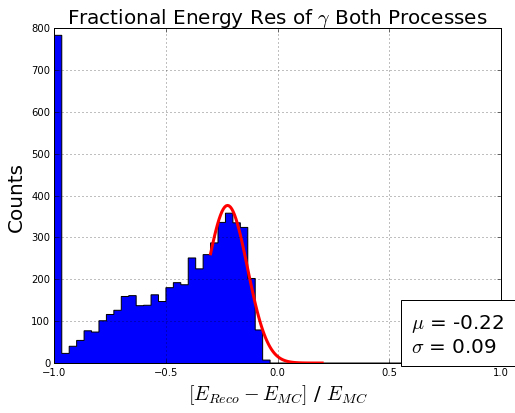

In [76]:
plt.figure(figsize=(8,6))
n_counts_clus, bin_edges_clus, _ = plt.hist(res_clus,bins=60,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins_clus = (bin_edges_clus[:-1] + bin_edges_clus[1:])/2

# Calculate Gaussian distribution
coeff_clus, _ = curve_fit(gauss, bins_clus[20:], n_counts_clus[20:], p0=([500.,0,0.5]))
print coeff_clus

x_g = np.linspace(-.3,0.2,80)

bias = -0.18
plt.figure(figsize=(8,6))
n_counts_clus, bin_edges_clus, _ = plt.hist(res_clus,bins=60,range=(-1,1.),histtype='step',fill='b',edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff_clus), 'r-',label='Gaussian Fit',lw=3)
plt.text(0.6, 30, '$\mu$ = %.2f \n$\sigma$ = %.2f' % \
                (coeff_clus[1], coeff_clus[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
plt.title("Fractional Energy Res of $\gamma$ Both Processes",fontsize=20)
plt.xlabel("$[E_{Reco} - E_{MC}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
#plt.axvline(bias,color='g',lw=3)
plt.savefig("Plots/EnergyResolution_Gamma_ClusGaus.png")